In [42]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# --- Load your JSON training log ---
log_path = "results/results_20250506_005851.json"  # ? Change to your actual JSON file path
with open(log_path, "r") as f:
    records = json.load(f)
# Convert to DataFrame and sort by epoch
df = pd.DataFrame(records)
df = df.sort_values("epoch")
df.head(20)

,final_train_loss,final_val_link_loss,final_val_link_auc,final_val_pr_auc,final_val_cox_loss,c_indices_per_condition,pr_auc_per_condition,mean_c_index,epoch,NEGATIVE_MULTIPLIER,timestamp
0,0.706943,1.570838,0.809911,0.561049,5.969111,"[0.8310588835610785, 0.8513088982978796, 0.845...","[0.5522274348820999, 0.6530939476061428, 0.560...",0.853515,1,3,2025-05-06T00:23:21.657688
1,0.631058,1.475645,0.858913,0.642440,5.900630,"[0.8190148428295926, 0.896111777108946, 0.8766...","[0.566590211190279, 0.630324416962348, 0.70471...",0.881083,2,3,2025-05-06T00:24:05.751008
2,0.613851,1.364577,0.851100,0.659822,5.667110,"[0.8484033452646271, 0.8993595793160911, 0.878...","[0.5975308485173556, 0.6994115046746625, 0.636...",0.886045,3,3,2025-05-06T00:24:46.907365
3,0.608881,1.622447,0.829558,0.599627,5.573719,"[0.8477514388840113, 0.9038832279072931, 0.886...","[0.5494039811098332, 0.732539288769939, 0.7806...",0.890729,4,3,2025-05-06T00:25:30.547077
4,0.590252,1.687404,0.876140,0.712529,5.427782,"[0.8753198562241582, 0.9274967479467429, 0.913...","[0.6333491591038192, 0.9010233918128655, 0.740...",0.913792,5,3,2025-05-06T00:26:14.135323
5,0.565635,1.365173,0.858866,0.683923,5.651741,"[0.8548832008884687, 0.9288623977622473, 0.902...","[0.5804198335574186, 0.7478452060495404, 0.690...",0.905366,6,3,2025-05-06T00:26:58.679495
6,0.568411,1.948877,0.901612,0.765651,5.408515,"[0.8683383609854198, 0.9397142656736214, 0.914...","[0.6713931359984399, 0.8288884998443823, 0.863...",0.910564,7,3,2025-05-06T00:27:42.964360
7,0.559374,1.202278,0.889608,0.724390,5.382723,"[0.8855805812566129, 0.9486510355557822, 0.921...","[0.5863757235288629, 0.8653477340977341, 0.747...",0.919193,8,3,2025-05-06T00:28:26.500479
8,0.541180,1.292974,0.905002,0.806762,5.297969,"[0.8721618153576012, 0.9470276658334609, 0.923...","[0.7732985589619715, 0.8715019893899204, 0.854...",0.914857,9,3,2025-05-06T00:29:08.901458
9,0.540789,1.585523,0.877019,0.696120,5.398020,"[0.8782809181843423, 0.9503992798721285, 0.910...","[0.581454690658293, 0.8545419004977828, 0.6930...",0.911337,10,3,2025-05-06T00:29:51.500112


In [29]:
len(df)

50

# --- 1) Plot Train vs. Val Losses ---

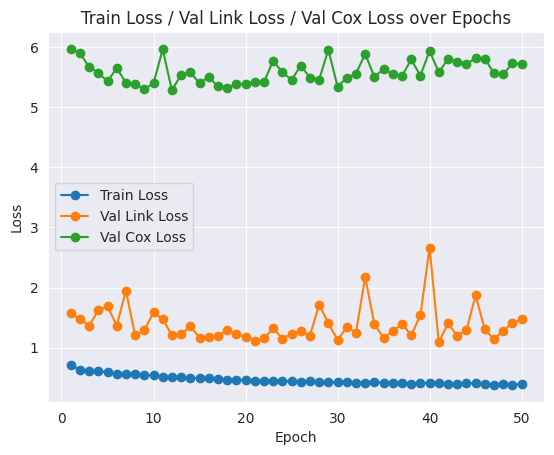

In [44]:
plt.figure()
plt.plot(df["epoch"], df["final_train_loss"], marker='o', linewidth=1.5)
plt.plot(df["epoch"], df["final_val_link_loss"], marker='o', linewidth=1.5)
plt.plot(df["epoch"], df["final_val_cox_loss"], marker='o', linewidth=1.5)
plt.title("Train Loss / Val Link Loss / Val Cox Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train Loss", "Val Link Loss", "Val Cox Loss"])
plt.grid(True)

# --- 2) Plot Link Prediction AUCs ---

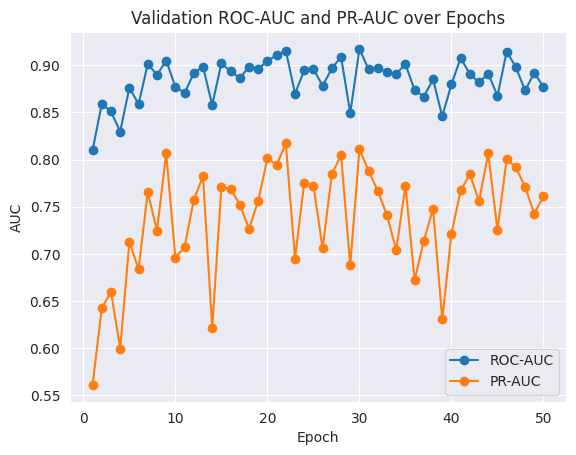

In [45]:
plt.figure()
plt.plot(df["epoch"], df["final_val_link_auc"],  marker='o', linewidth=1.5)
plt.plot(df["epoch"], df["final_val_pr_auc"],    marker='o', linewidth=1.5)
plt.title("Validation ROC-AUC and PR-AUC over Epochs")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend(["ROC-AUC", "PR-AUC"])
plt.grid(True)

# --- 3) Plot Mean C-Index ---

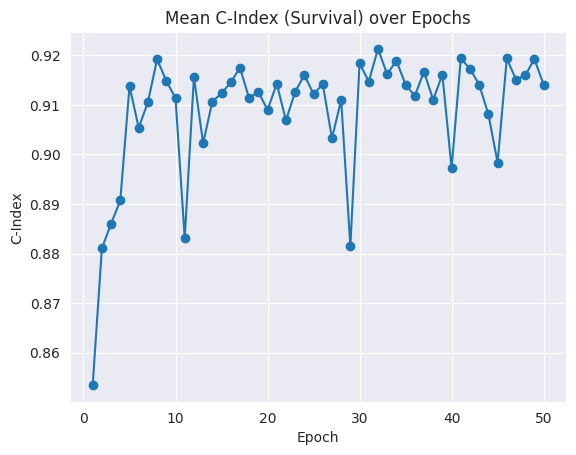

In [46]:
plt.figure()
plt.plot(df["epoch"], df["mean_c_index"], marker='o', linewidth=1.5)
plt.title("Mean C-Index (Survival) over Epochs")
plt.xlabel("Epoch")
plt.ylabel("C-Index")
plt.grid(True)

# --- 4) Per-Condition C-Index and PR-AUC Trends ---

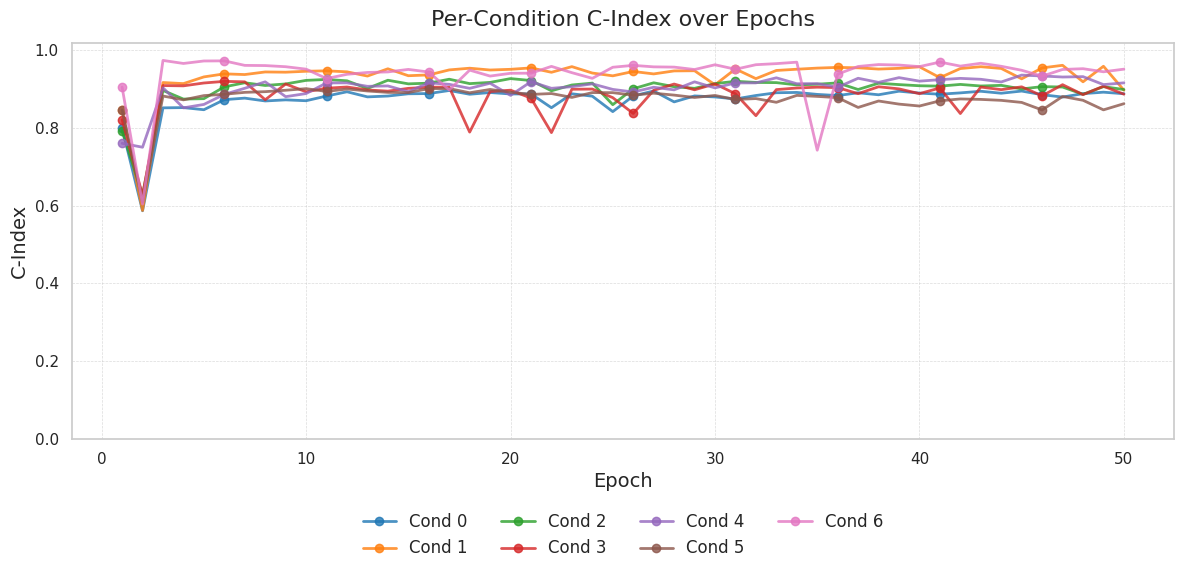

In [47]:
# Expand the list of per-condition c-indices into a DataFrame
sns.set(style="whitegrid", context="notebook", palette="tab10")

fig, ax = plt.subplots(figsize=(12, 6))

# plot each condition
for cond_idx in cidx_df.columns:
    ax.plot(
        cidx_df.index,
        cidx_df[cond_idx],
        label=f"Cond {cond_idx}",
        linewidth=2,
        marker='o',
        markersize=6,
        markevery=5,
        alpha=0.8
    )

# titles and labels
ax.set_title("Per-Condition C-Index over Epochs", fontsize=16, pad=12)
ax.set_xlabel("Epoch", fontsize=14)
ax.set_ylabel("C-Index", fontsize=14)

# fix y-range (adjust if your values lie in a narrower band)
ax.set_ylim(0.0, 1.02)

# subtle dashed grid
ax.grid(which='major', linestyle='--', linewidth=0.5, alpha=0.7)

# legend below the plot, no frame
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=4,
    frameon=False,
    fontsize=12
)

plt.tight_layout()
plt.show()

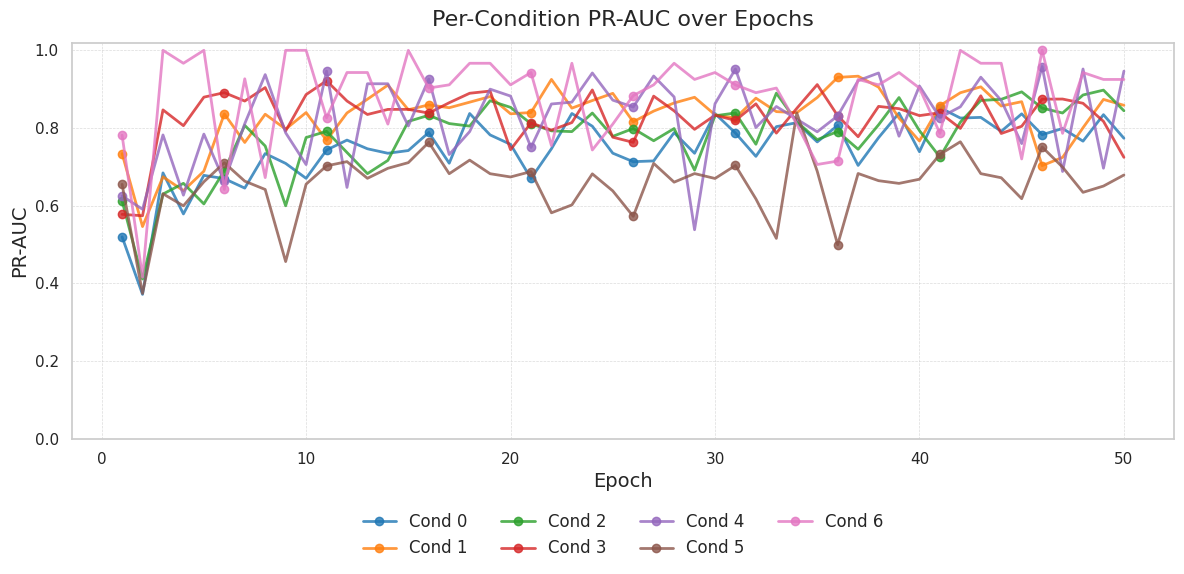

In [48]:
# Expand the list of per-condition link pr-auc into a DataFrame
sns.set(style="whitegrid", context="notebook", palette="tab10")

fig, ax = plt.subplots(figsize=(12, 6))

# plot each condition with a distinct color, marker every 5 points
for cond_idx in prauc_df.columns:
    ax.plot(
        prauc_df.index,
        prauc_df[cond_idx],
        label=f"Cond {cond_idx}",
        linewidth=2,
        marker='o',
        markersize=6,
        markevery=5,
        alpha=0.8
    )

# Labels, title, limits
ax.set_title("Per-Condition PR-AUC over Epochs", fontsize=16, pad=12)
ax.set_xlabel("Epoch", fontsize=14)
ax.set_ylabel("PR-AUC", fontsize=14)
ax.set_ylim(0.0, 1.02)

# Grid tweaks
ax.grid(which='major', linestyle='--', linewidth=0.5, alpha=0.7)

# Legend outside
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=4,
    frameon=False,
    fontsize=12
)

plt.tight_layout()
plt.show()

# --- 5) Display raw DataFrame for inspection ---

In [26]:
df.columns

Index(['final_train_loss', 'final_val_link_loss', 'final_val_link_auc',
       'final_val_pr_auc', 'final_val_cox_loss', 'c_indices_per_condition',
       'mean_c_index', 'epoch', 'NEGATIVE_MULTIPLIER', 'timestamp'],
      dtype='object')

In [27]:
df.head()

,final_train_loss,final_val_link_loss,final_val_link_auc,final_val_pr_auc,final_val_cox_loss,c_indices_per_condition,mean_c_index,epoch,NEGATIVE_MULTIPLIER,timestamp
0,0.699573,0.103719,0.814495,0.627509,0.361537,"[None, 0.7507867057216345, None, 0.94828000565...",0.852025,1,3,2025-05-04T14:54:06.940315
1,0.629121,0.099927,0.823914,0.622297,0.338229,"[None, 0.7753598820570415, None, 0.96320446437...",0.883405,2,3,2025-05-04T14:55:19.612514
2,0.608503,0.086052,0.847945,0.732109,0.332700,"[None, 0.7890356750809346, None, 0.97582532365...",0.896022,3,3,2025-05-04T14:56:30.129553
3,0.598460,0.116260,0.841324,0.704958,0.323362,"[None, 0.8044483485786968, None, 0.97871151333...",0.903925,4,3,2025-05-04T14:57:45.164251
4,0.587677,0.098291,0.849294,0.660343,0.350616,"[None, 0.798524701689281, None, 0.959688626184...",0.856929,5,3,2025-05-04T14:58:56.180737
